In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/ColabLibraries')

In [ ]:
import os

In [ ]:
labels_train_dir = '/content/drive/MyDrive/VisionSEO_Project/web_elements_detection/data/labels/train'
images_train_dir = '/content/drive/MyDrive/VisionSEO_Project/web_elements_detection/data/images/train'

# Get lists of filenames without extensions
image_files = set(os.path.splitext(file)[0] for file in os.listdir(images_train_dir))
label_files = set(os.path.splitext(file)[0] for file in os.listdir(labels_train_dir))

# Find images without corresponding labels
images_without_labels = image_files - label_files

# Find labels without corresponding images
labels_without_images = label_files - image_files

# Output the results
print(f"Images without corresponding labels: {len(images_without_labels)}")
for img in images_without_labels:
    print(img)

print(f"\nLabels without corresponding images: {len(labels_without_images)}")
for lbl in labels_without_images:
    print(lbl)

Images without corresponding labels: 0

Labels without corresponding images: 0


In [ ]:
images_to_delete = [
    '4 - Nidal 147', '5 - Nidal 147', '3 - Nidal 147'
    ]

# Function to delete files with given names
def delete_files(dir_path, filenames):
    for filename in filenames:
        file_path = os.path.join(dir_path, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted: {file_path}")
        else:
            print(f"File not found: {file_path}")

# Delete the files
delete_files(images_train_dir, [f"{img}.png" for img in images_to_delete] + [f"{img}.jpg" for img in images_to_delete])

Deleted: /content/drive/MyDrive/screenshot_analyzer/data/images/train/4 - Nidal 147.png
Deleted: /content/drive/MyDrive/screenshot_analyzer/data/images/train/5 - Nidal 147.png
Deleted: /content/drive/MyDrive/screenshot_analyzer/data/images/train/3 - Nidal 147.png
File not found: /content/drive/MyDrive/screenshot_analyzer/data/images/train/4 - Nidal 147.jpg
File not found: /content/drive/MyDrive/screenshot_analyzer/data/images/train/5 - Nidal 147.jpg
File not found: /content/drive/MyDrive/screenshot_analyzer/data/images/train/3 - Nidal 147.jpg


In [ ]:
import yaml

# Define paths and classes
dataset_yaml_path = '/content/drive/MyDrive/VisionSEO_Project/web_elements_detection/data/dataset.yaml'
images_train_path = '/content/drive/MyDrive/VisionSEO_Project/web_elements_detection/data/images/train'
labels_train_path = '/content/drive/MyDrive/VisionSEO_Project/web_elements_detection/data/labels/train'

classes = [
    'dog', 'person', 'cat', 'tv', 'car', 'meatballs', 'marinara sauce',
    'tomato soup', 'chicken noodle soup', 'french onion soup', 'chicken breast',
    'ribs', 'pulled pork', 'hamburger', 'cavity', 'search_box', 'time_date', 'link', 'text'
    ]

# Prepare the YAML content
yaml_content = {
    'path': '/content/drive/MyDrive/VisionSEO_Project/web_elements_detection/data',
    'train': {
        'images': images_train_path,
        'labels': labels_train_path
    },
    'val': {
        'images': images_train_path,  # Assuming you use the same for validation
        'labels': labels_train_path   # Assuming you use the same for validation
    },
    'nc': len(classes),
    'names': classes
}

# Write to dataset.yaml
with open(dataset_yaml_path, 'w') as file:
    yaml.dump(yaml_content, file, sort_keys=False)

print(f"Dataset YAML file created at: {dataset_yaml_path}")


Dataset YAML file created at: /content/drive/MyDrive/screenshot_analyzer/data/dataset.yaml


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract
from PIL import Image
import numpy as np

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 96.7MB/s]


In [ ]:
# Train the model on your filtered dataset
model.train(data='/content/drive/MyDrive/screenshot_analyzer/data/dataset.yaml',
            epochs=50,
            batch=16,
            imgsz=640,
            name='Screenshot_Detector'
            )

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/screenshot_analyzer/data/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=Screenshot_Detector4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /content/drive/MyDrive/screenshot_analyzer/data/labels/train... 152 images, 1 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:55<00:00,  2.74it/s]

train: New cache created: /content/drive/MyDrive/screenshot_analyzer/data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/screenshot_analyzer/data/labels/train.cache... 152 images, 1 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:00<?, ?it/s]

Plotting labels to runs/detect/Screenshot_Detector4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000435, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/Screenshot_Detector4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      3.544      6.726      2.428         28        640: 100%|██████████| 10/10 [02:20<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.65s/it]

                   all        152        604          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.967      5.638      2.006         28        640: 100%|██████████| 10/10 [02:10<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:34<00:00,  6.87s/it]

                   all        152        604     0.0027     0.0855    0.00365   0.000729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.435      5.091      1.822         25        640: 100%|██████████| 10/10 [02:14<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.47s/it]

                   all        152        604      0.002     0.0968     0.0052    0.00142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      2.132      4.649      1.674         28        640: 100%|██████████| 10/10 [02:12<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.47s/it]

                   all        152        604      0.171      0.557       0.23      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.873      4.056      1.547         29        640: 100%|██████████| 10/10 [02:09<00:00, 12.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.52s/it]

                   all        152        604      0.742      0.205      0.284      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.755      3.358      1.469         30        640: 100%|██████████| 10/10 [02:15<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.49s/it]

                   all        152        604      0.584      0.477      0.446      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.736      2.808      1.444         29        640: 100%|██████████| 10/10 [02:10<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:35<00:00,  7.04s/it]

                   all        152        604      0.549      0.566      0.527       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.688      2.341      1.444         31        640: 100%|██████████| 10/10 [02:11<00:00, 13.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.65s/it]

                   all        152        604      0.496      0.678      0.554      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G       1.69      2.206      1.447         23        640: 100%|██████████| 10/10 [02:09<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.61s/it]

                   all        152        604      0.555        0.7      0.602      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.628      1.968       1.43         29        640: 100%|██████████| 10/10 [02:11<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.59s/it]

                   all        152        604      0.593       0.69      0.618      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.508      1.853      1.382         29        640: 100%|██████████| 10/10 [02:09<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.45s/it]

                   all        152        604      0.661       0.75      0.683      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.524      1.715      1.366         31        640: 100%|██████████| 10/10 [02:11<00:00, 13.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.50s/it]

                   all        152        604      0.783      0.782      0.807      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.475      1.661      1.345         30        640: 100%|██████████| 10/10 [02:07<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.56s/it]

                   all        152        604      0.804      0.795      0.848      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G       1.48       1.57      1.318         28        640: 100%|██████████| 10/10 [02:12<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.51s/it]

                   all        152        604      0.845      0.821      0.866      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.405      1.505        1.3         30        640: 100%|██████████| 10/10 [02:11<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.59s/it]

                   all        152        604      0.842      0.834      0.878      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.407      1.488      1.296         31        640: 100%|██████████| 10/10 [02:10<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:34<00:00,  6.94s/it]

                   all        152        604      0.863      0.873      0.906      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.371      1.445      1.283         28        640: 100%|██████████| 10/10 [02:12<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.43s/it]

                   all        152        604      0.848      0.813      0.867      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.359      1.407      1.267         28        640: 100%|██████████| 10/10 [02:09<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.62s/it]

                   all        152        604      0.862      0.859      0.899      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.35      1.368       1.26         30        640: 100%|██████████| 10/10 [02:08<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.59s/it]

                   all        152        604      0.861      0.867      0.911      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.343      1.357      1.258         27        640: 100%|██████████| 10/10 [02:13<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.42s/it]

                   all        152        604      0.883       0.88      0.917      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G       1.31      1.313      1.241         30        640: 100%|██████████| 10/10 [02:12<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:34<00:00,  6.87s/it]

                   all        152        604       0.88      0.869      0.916      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.314      1.329      1.235         29        640: 100%|██████████| 10/10 [02:09<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.50s/it]

                   all        152        604      0.878      0.902      0.925      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.279      1.252      1.219         32        640: 100%|██████████| 10/10 [02:08<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.66s/it]

                   all        152        604      0.887      0.901      0.928      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.276      1.277      1.238         29        640: 100%|██████████| 10/10 [02:10<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.51s/it]

                   all        152        604      0.902      0.899      0.933      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.259      1.254      1.221         30        640: 100%|██████████| 10/10 [02:10<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.65s/it]

                   all        152        604      0.896      0.903       0.93      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.269      1.221      1.219         31        640: 100%|██████████| 10/10 [02:10<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.46s/it]

                   all        152        604      0.901      0.898       0.93      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.285      1.267      1.228         29        640: 100%|██████████| 10/10 [02:12<00:00, 13.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.49s/it]

                   all        152        604      0.899      0.901      0.931      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.221      1.225      1.215         29        640: 100%|██████████| 10/10 [02:10<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.55s/it]

                   all        152        604      0.909      0.914      0.939      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.238      1.206      1.211         30        640: 100%|██████████| 10/10 [02:07<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.54s/it]

                   all        152        604      0.905       0.91      0.942      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.254      1.195      1.202         32        640: 100%|██████████| 10/10 [02:10<00:00, 13.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.51s/it]

                   all        152        604      0.895      0.929      0.946      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.214      1.201      1.185         27        640: 100%|██████████| 10/10 [02:07<00:00, 12.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.64s/it]

                   all        152        604      0.905      0.918      0.947      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.223      1.167      1.192         31        640: 100%|██████████| 10/10 [02:14<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.42s/it]

                   all        152        604      0.911      0.917      0.949      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.199      1.123      1.187         30        640: 100%|██████████| 10/10 [02:13<00:00, 13.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.42s/it]

                   all        152        604      0.908      0.926      0.949       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.191      1.155      1.178         32        640: 100%|██████████| 10/10 [02:10<00:00, 13.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.56s/it]

                   all        152        604      0.905      0.937      0.949       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.224      1.184      1.187         30        640: 100%|██████████| 10/10 [02:10<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.53s/it]

                   all        152        604      0.902      0.939      0.948      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.188      1.134      1.159         29        640: 100%|██████████| 10/10 [02:10<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.65s/it]

                   all        152        604      0.922      0.927      0.949      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       1.16      1.111      1.182         29        640: 100%|██████████| 10/10 [02:11<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.52s/it]

                   all        152        604      0.907      0.934      0.949      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.168      1.109      1.183         29        640: 100%|██████████| 10/10 [02:08<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.69s/it]

                   all        152        604      0.912      0.942      0.954      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.163      1.148      1.177         31        640: 100%|██████████| 10/10 [02:12<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:34<00:00,  6.91s/it]

                   all        152        604      0.917      0.947      0.955      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.167      1.121      1.157         25        640: 100%|██████████| 10/10 [02:12<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:34<00:00,  7.00s/it]

                   all        152        604      0.916      0.941      0.954      0.648


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.181      1.103      1.172         31        640: 100%|██████████| 10/10 [02:14<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.43s/it]

                   all        152        604      0.916      0.942      0.954      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.176      1.116      1.162         29        640: 100%|██████████| 10/10 [02:13<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:34<00:00,  6.96s/it]

                   all        152        604      0.918      0.945      0.956      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.147      1.125      1.141         29        640: 100%|██████████| 10/10 [02:11<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.64s/it]

                   all        152        604      0.919      0.936      0.956      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G       1.14      1.082      1.154         25        640: 100%|██████████| 10/10 [02:08<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.64s/it]

                   all        152        604      0.912      0.946      0.956      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.147      1.081      1.161         29        640: 100%|██████████| 10/10 [02:13<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.54s/it]

                   all        152        604      0.912      0.947      0.957      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.153      1.111      1.159         29        640: 100%|██████████| 10/10 [02:09<00:00, 12.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.50s/it]

                   all        152        604      0.917      0.954      0.958       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.093      1.056      1.155         31        640: 100%|██████████| 10/10 [02:09<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.44s/it]

                   all        152        604       0.92      0.953      0.958      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.128       1.05      1.128         31        640: 100%|██████████| 10/10 [02:10<00:00, 13.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.46s/it]

                   all        152        604      0.921      0.951      0.957      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.134      1.057      1.134         27        640: 100%|██████████| 10/10 [02:10<00:00, 13.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.51s/it]

                   all        152        604      0.922       0.95      0.957      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.139      1.088      1.142         30        640: 100%|██████████| 10/10 [02:08<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.52s/it]

                   all        152        604      0.923      0.948      0.957      0.674



50 epochs completed in 2.293 hours.
Optimizer stripped from runs/detect/Screenshot_Detector4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/Screenshot_Detector4/weights/best.pt, 6.2MB

Validating runs/detect/Screenshot_Detector4/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,009,353 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.69s/it]


                   all        152        604      0.923      0.945      0.957      0.675
            search_box        147        147      0.967      0.993       0.98      0.717
             time_date        151        151          1      0.997      0.995      0.745
                  link        151        151      0.771      0.824      0.868      0.541
                  text        151        155      0.954      0.968      0.984      0.699
Speed: 1.5ms preprocess, 147.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/Screenshot_Detector4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([15, 16, 17, 18])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2c90495180>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [ ]:
!zip -r /content/runs.zip /content/runs

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/Screenshot_Detector2/ (stored 0%)
updating: content/runs/detect/Screenshot_Detector2/args.yaml (deflated 52%)
updating: content/runs/detect/Screenshot_Detector2/results.csv (deflated 74%)
updating: content/runs/detect/Screenshot_Detector2/labels_correlogram.jpg (deflated 50%)
updating: content/runs/detect/Screenshot_Detector2/labels.jpg (deflated 36%)
updating: content/runs/detect/Screenshot_Detector2/train_batch2.jpg (deflated 7%)
updating: content/runs/detect/Screenshot_Detector2/weights/ (stored 0%)
updating: content/runs/detect/Screenshot_Detector2/weights/last.pt (deflated 35%)
updating: content/runs/detect/Screenshot_Detector2/weights/best.pt (deflated 35%)
updating: content/runs/detect/Screenshot_Detector2/events.out.tfevents.1723612898.b0c4fd93a1e9.1487.0 (deflated 93%)
updating: content/runs/detect/Screenshot_Detector2/train_batch0.jpg (deflated 8%)
updating: content/ru

In [ ]:
from google.colab import files
files.download('/content/runs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the model
model = YOLO('/content/drive/MyDrive/VisionSEO_Project/runs/content/runs/detect/Screenshot_Detector/weights/best.pt')



image 1/1 /content/drive/MyDrive/VisionSEO_Project/screenshots/Screenshot (28) - ahmad sheikh.png: 384x640 1 search_box, 1 link, 1 text, 302.8ms
Speed: 17.6ms preprocess, 302.8ms inference, 32.5ms postprocess per image at shape (1, 3, 384, 640)


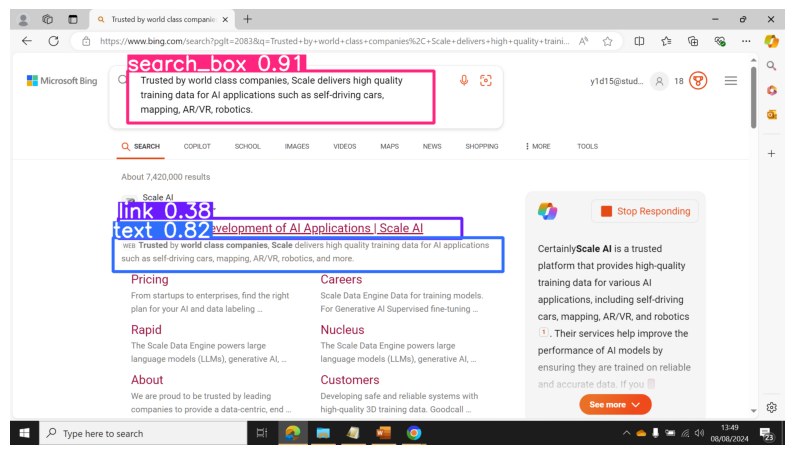

In [ ]:
# Test the model on your image
results = model('/content/drive/MyDrive/VisionSEO_Project/screenshots/Screenshot (28) - ahmad sheikh.png')

# Extract the result image and display it
result_image = results[0].plot()  # Get the plot as a PIL image

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.axis('off')  # Hide the axes
plt.show()